# SMU 7331 Data Mining Project 3
##### Authors: Shon Mohsin, Heber Nielsen, Jose Torres, Lokesh Maganti

### Exceptional Work:
#### Requirements: You have free reign to provide additional analyses or combine analyses.

# Making and plotting a Gaussian Mixed Model

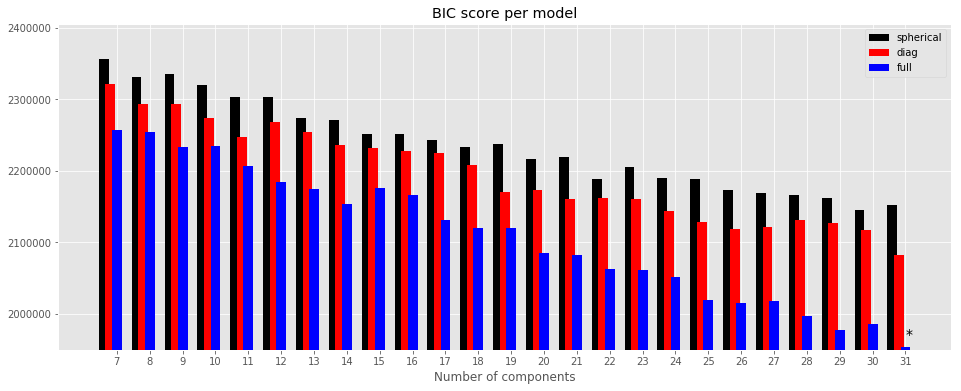

In [24]:

    ### THIS CODE TAKES ABOUT 15 - 20 MINUTES TO RUN. -Heber

import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

X = (df_adjacent_coords
     .query('Class==\'fist\'')
     .loc[:,['X','Y','Z']]
     .values)

lowest_bic = np.infty
bic = []
n_components_range = range(7, 32)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
clf = best_gmm
bars = []

plt.figure(figsize=(16,6))
spl = plt.subplot(1,1,1)
# Plot the BIC scores
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.3, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max() + 50000])
plt.title('BIC score per model')

xpos = np.min(n_components_range)-0.4 + np.mod(bic.argmin(), len(n_components_range)) +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

### This Gaussian Mixed Model is somewhat surprising in terms of the numbers of clusters. Originally the data were derived from 14 users, who each contributed data in 5 hand positions. That might indicate there could be as few as 5 or as many as 5x14=60 clusters. But in addition, each instance has a reading from at least 3 and as many as 7 markers, which might suggest that the number of ideal clusters could be as high as 7x60=420.  We would not expect so many clusters because of the conditions of the experiment, for several reasons. First, some of the markers do not change their location with 2 or more of the hand gestures. For example, a marker on the proximal metacarpal-metacarpal joint (first knuckle) would not change its theoretical position when the hand is held for a "Stop" position and a XXX position, nor would many of them change between a "Stop" position, a "One Finger Extended" position and a "2 Finger Extended Position". This could profoundly reduce the potentially large number of clusters. Second, it appears reasonable that for some of the gestures many of the users would have sufficiently similar size hands that markers would be closely clustered between such individuals. Overall, it is pretty impossible to predict in advance how many clusters should be present. Similarly, it is difficult to declare what data points, if any, are outliers.

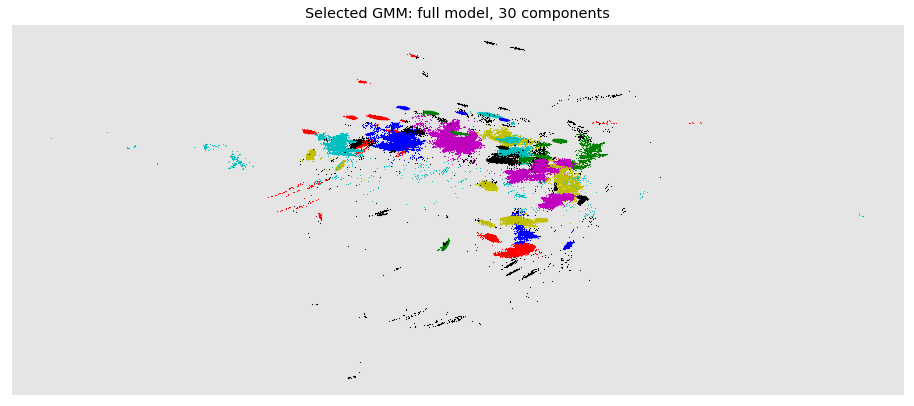

In [26]:

### PLOT THE GAUSSIAN MIXED MODEL
### This code is a modification of sklearn's website example

plt.figure(figsize=(16,6))
splot = plt.subplot(1, 1, 1)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .4, color=color)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 30 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

### Discussion of the GMM: This is a 2-dimensional modeling of 3-dimensional data. The modeling using K-means with silhouette clustering provides a model for which it is easier to identify the validity of the clustering. One of the problems with the GMM is that we have minimized the BIC value at 30 clusters. Perhaps some further tuning of GMM  model could be done to improve the BIC scores, but it appears unlikely that this would actually reduce the number of clusters identified. One of the issues with this data set, which this analysis highlights, is the degree of variability between subjects and within subjects, for the same hand position (Class). The major goal of cluster analysis is to identify elements that are part of the same set. With high variability and overlapping of possible sets this becomes more challenging, and more so when the data progress beyond 2 dimensions. More advanced modeling techniques are needed to improve the quality of the clustering, such as the silhouette cluster scoring as used above.  